#Tratamento dos Dados

In [ ]:
import pandas as pd
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(uri_filmes)
filmes.columns = ['filme_id','titulo','generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
#EXTRAINDO OS DUMMIES
generos = filmes.generos.str.get_dummies() #os Dumies fazem com que eu consiga transformar uma coluna com strings categoricas em varias colunas com zeros e uns para otimizar o processo
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dados_dos_filmes = pd.concat([filmes,generos],axis=1) #concatenar dois data frames, podemos concatenar um do lado do outro ou um em cima do outro, se axis=1 é ao lado, axis=0 é embaixo
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#reescalando os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos) #o algoritmo esta aprendendo com os generos e vai transformalos de modo a identificar
#um agrupando entre os generos, para atribuir pesos aos generos e verificar qual genero inflencia mais que outro para o filme ser classificado
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [ ]:
generos_escalados.shape

(9742, 20)

#Clusterização

In [ ]:
#CLUSTERIZAÇÃO (kmeans)
#agrupando os filmes
from sklearn.cluster import KMeans
modelo = KMeans(n_clusters=3) #numero de clusters que o modelo vai tentar criar
modelo.fit(generos_escalados)
print('Grupos {}'.format(modelo.labels_))

Grupos [0 0 1 ... 1 0 1]


In [ ]:
print(generos.columns)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')


In [ ]:
print(modelo.cluster_centers_) #lista as coordenadas dos centroides

[[-0.05917995  0.11984646  1.11344003  1.93952839  2.12777581  0.16365394
  -0.33003201 -0.19985056 -0.5982204   1.20422946 -0.09492563 -0.27615788
   0.29933867  0.31485401 -0.14100676 -0.27191286  0.14354607 -0.47043332
  -0.17371185 -0.08973526]
 [ 0.04157696 -0.38436764 -0.24859801 -0.25219187 -0.2690643   0.2728508
  -0.26611012  0.14858974  0.11933834 -0.16143465 -0.08935267 -0.14040235
  -0.11317791  0.03152593 -0.18610703  0.23117366 -0.22462337 -0.46829568
   0.02307779  0.04835166]
 [-0.05917995  0.70644786  0.07056056 -0.23050653 -0.26774086 -0.59424944
   0.64312741 -0.21584483 -0.01010836 -0.13363714  0.21001871  0.3773725
   0.10953762 -0.17903415  0.41628545 -0.35035754  0.38543122  1.09060828
   0.01968656 -0.06102366]]


In [ ]:
grupos = pd.DataFrame(modelo.cluster_centers_,
             columns = generos.columns)
grupos
#criando dataframe com os centroides

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.119846,1.113440,1.939528,2.127776,0.163654,-0.330032,-0.199851,-0.598220,1.204229,-0.094926,-0.276158,0.299339,0.314854,-0.141007,-0.271913,0.143546,-0.470433,-0.173712,-0.089735
1,0.041577,-0.384368,-0.248598,-0.252192,-0.269064,0.272851,-0.266110,0.148590,0.119338,-0.161435,-0.089353,-0.140402,-0.113178,0.031526,-0.186107,0.231174,-0.224623,-0.468296,0.023078,0.048352
2,-0.059180,0.706448,0.070561,-0.230507,-0.267741,-0.594249,0.643127,-0.215845,-0.010108,-0.133637,0.210019,0.377373,0.109538,-0.179034,0.416285,-0.350358,0.385431,1.090608,0.019687,-0.061024


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fac96193518>,
      dtype=object)

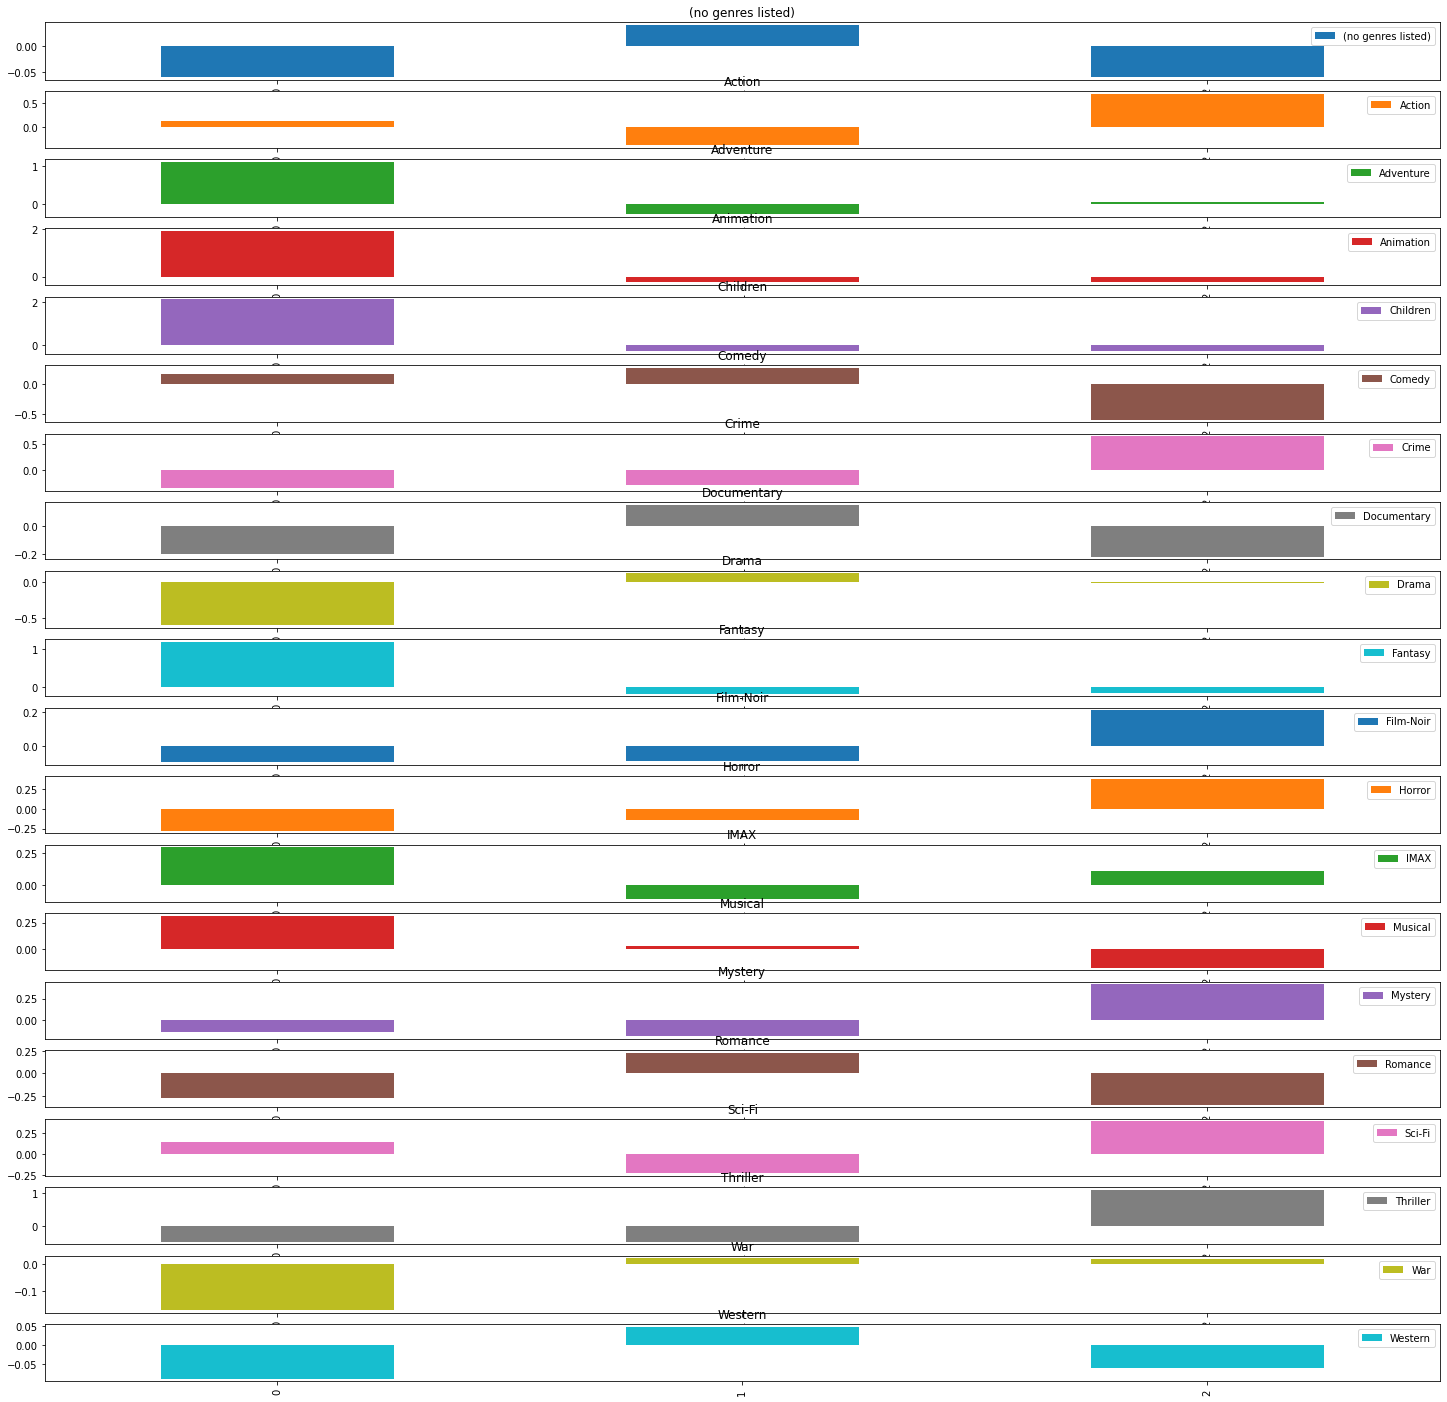

In [ ]:
grupos.plot.bar(subplots=True,
                figsize=(25,25),
                sharex=False)

In [ ]:
grupos.transpose() #transposição 

,0,1,2
(no genres listed),-0.059180,0.041577,-0.059180
Action,0.119846,-0.384368,0.706448
Adventure,1.113440,-0.248598,0.070561
Animation,1.939528,-0.252192,-0.230507
Children,2.127776,-0.269064,-0.267741
Comedy,0.163654,0.272851,-0.594249
Crime,-0.330032,-0.266110,0.643127
Documentary,-0.199851,0.148590,-0.215845
Drama,-0.598220,0.119338,-0.010108
Fantasy,1.204229,-0.161435,-0.133637


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fac95b2c240>,
      dtype=object)

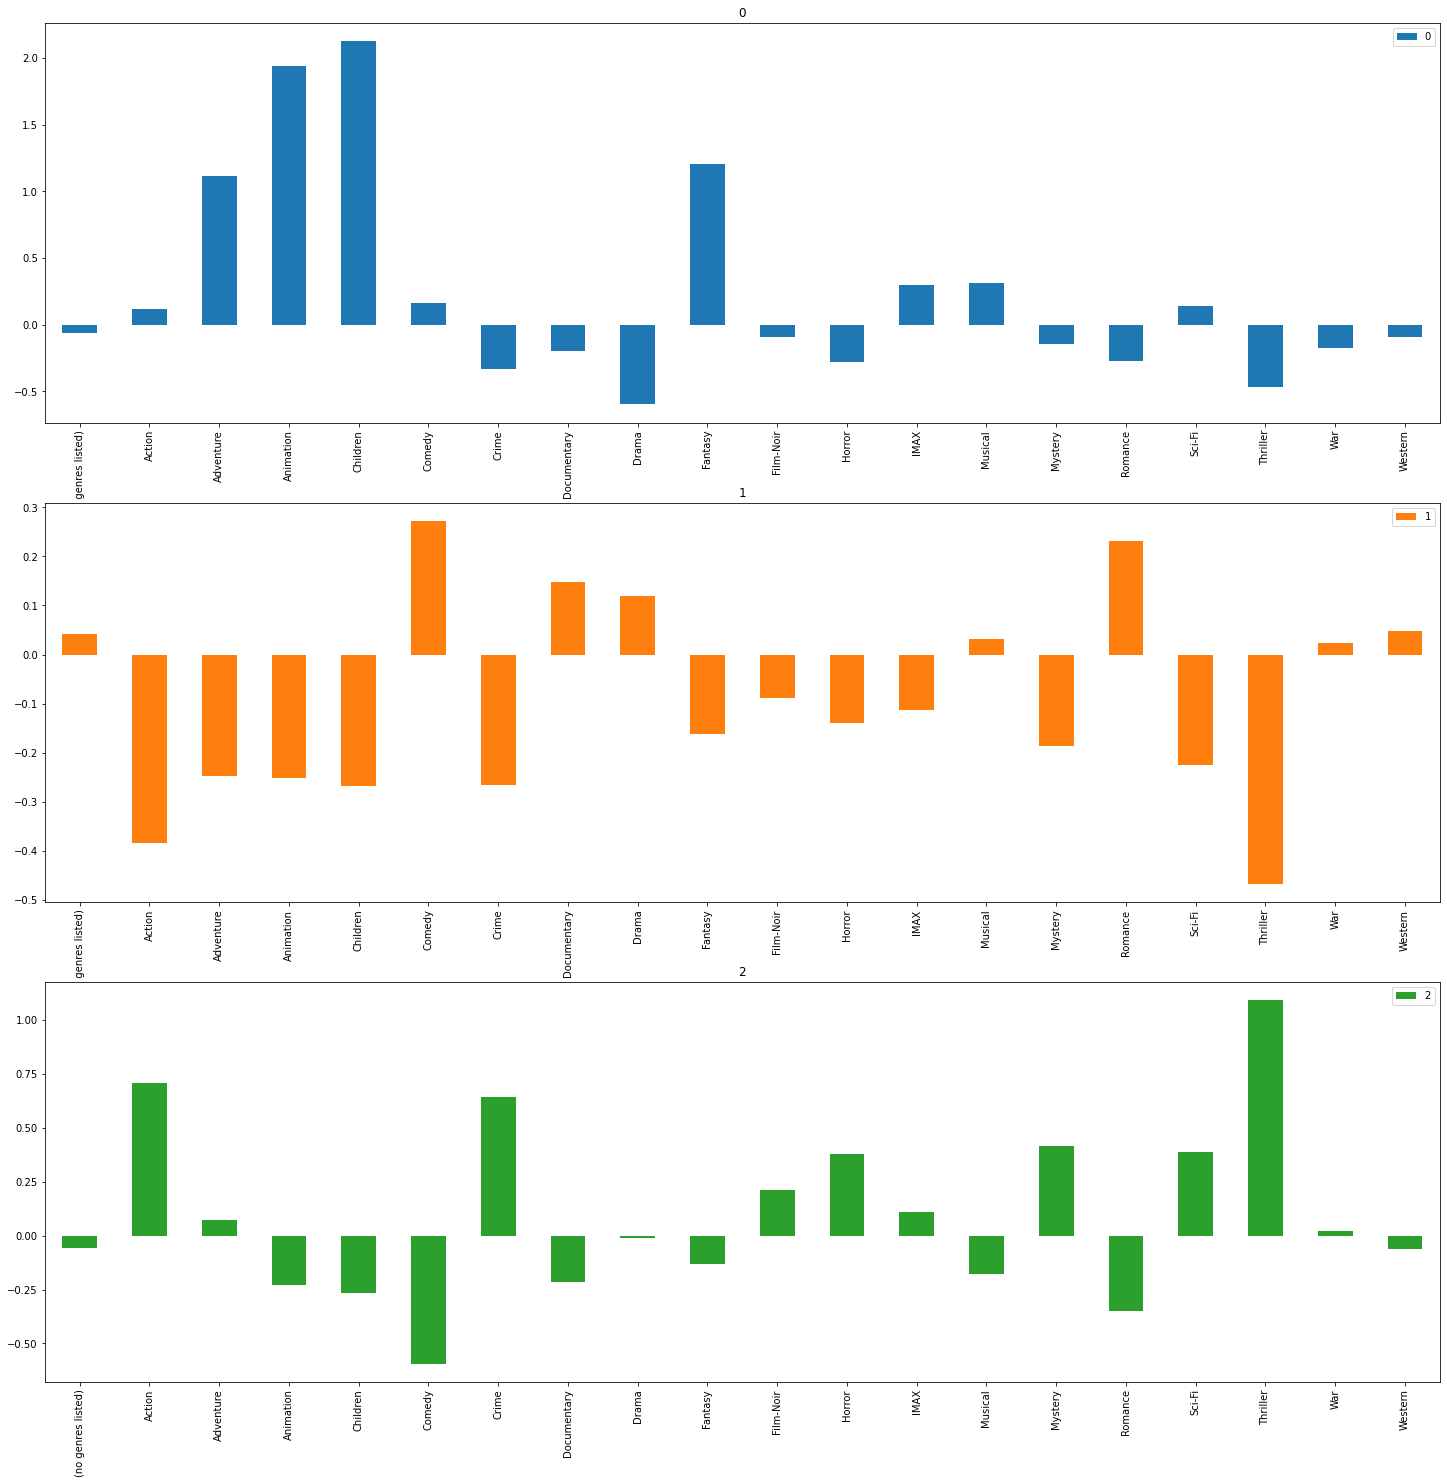

In [ ]:
grupos.transpose().plot.bar(subplots=True,
                figsize=(25,25),
                sharex=False)

In [ ]:
#testando se o modelo fez uma separação que faz sentido
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7837,93272,Dr. Seuss' The Lorax (2012),Animation|Fantasy|Musical|IMAX,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0
4383,6427,"Railway Children, The (1970)",Children|Drama,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
438,502,"Next Karate Kid, The (1994)",Action|Children|Romance,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6862,62376,City of Ember (2008),Adventure|Children|Sci-Fi,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4105,5882,Treasure Planet (2002),Adventure|Animation|Children|Sci-Fi|IMAX,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4769,7099,Nausicaä of the Valley of the Wind (Kaze no ta...,Adventure|Animation|Drama|Fantasy|Sci-Fi,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
6149,44022,Ice Age 2: The Meltdown (2006),Adventure|Animation|Children|Comedy,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1081,1405,Beavis and Butt-Head Do America (1996),Adventure|Animation|Comedy|Crime,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9145,147372,Doctor Who: Last Christmas (2014),Adventure|Drama|Fantasy|Sci-Fi,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0


#Visualizando os Centróides

In [ ]:
# Essa função gera dados em formas de "bolhas", isto é, os dados são gerados em forma de grupos
#Como o make_blobs nos retorna um par de dados (x, y) e não queremos o y, usamos o underscore (_) para ignorar o retorno dessa variável.
#o n_features representa em quantas dimensões queremos os dados
#o random state é para obtermos os mesmos dados
from sklearn.datasets import make_blobs
dados, _ = make_blobs(n_samples=1000, n_features=2, random_state=7)
dados = pd.DataFrame(dados, columns=['coluna1', 'coluna2'])
dados.head()

,coluna1,coluna2
0,9.829632,0.763094
1,-9.723548,4.100788
2,10.403457,1.761671
3,-2.253417,4.660486
4,13.059859,-0.004112


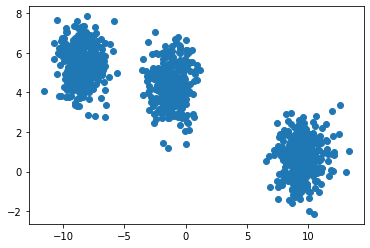

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=dados.coluna1, y=dados.coluna2)
#dispersão dos dados após termos feito a rescalação, para asssim determinarmos para o KMeans quantos cluster iremos utilizar

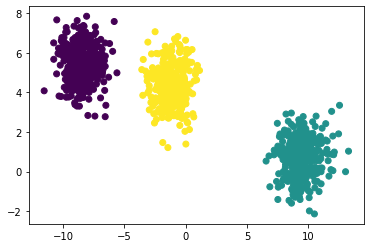

In [ ]:
modelo_centroide = KMeans(n_clusters=3)
grupos = modelo_centroide.fit_predict(dados)
plt.scatter(x=dados.coluna1, y=dados.coluna2, 
            c=grupos,
           cmap='viridis')
# Plotamos os dados segmentados identificando os grupos com cores distintas (c=grupos) e vívidas (cmap='viridis').

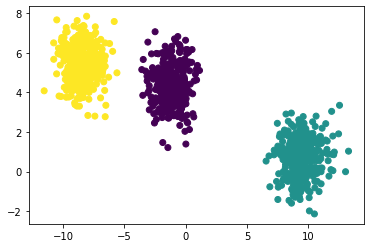

In [ ]:
# obtendo o centroide
modelo_centroide = KMeans(n_clusters=3)
grupos = modelo_centroide.fit_predict(dados)
plt.scatter(x=dados.coluna1, y=dados.coluna2, 
            c=grupos,
           cmap='viridis') 


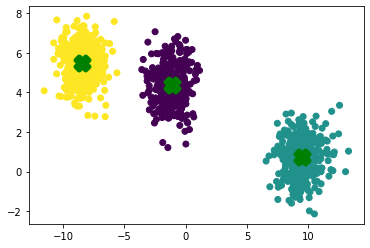

In [ ]:
centroides = modelo_centroide.cluster_centers_
plt.scatter(dados.coluna1, dados.coluna2,
            c=grupos,
           cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1],
           marker='X', s=169, linewidths=5,
           color='g', zorder=8)

#Gráfico de Clusterização

In [ ]:
#algoritmo para reduzir a dimensão dos dados para 2, para podermos visualizar
from sklearn.manifold import TSNE 
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 39.697117,  28.146019],
       [-13.582626,  48.19003 ],
       [ 24.334091, -34.559814],
       ...,
       [ 13.001554,  21.130348],
       [-18.583136,  25.598501],
       [-18.557728,  -1.493484]], dtype=float32)

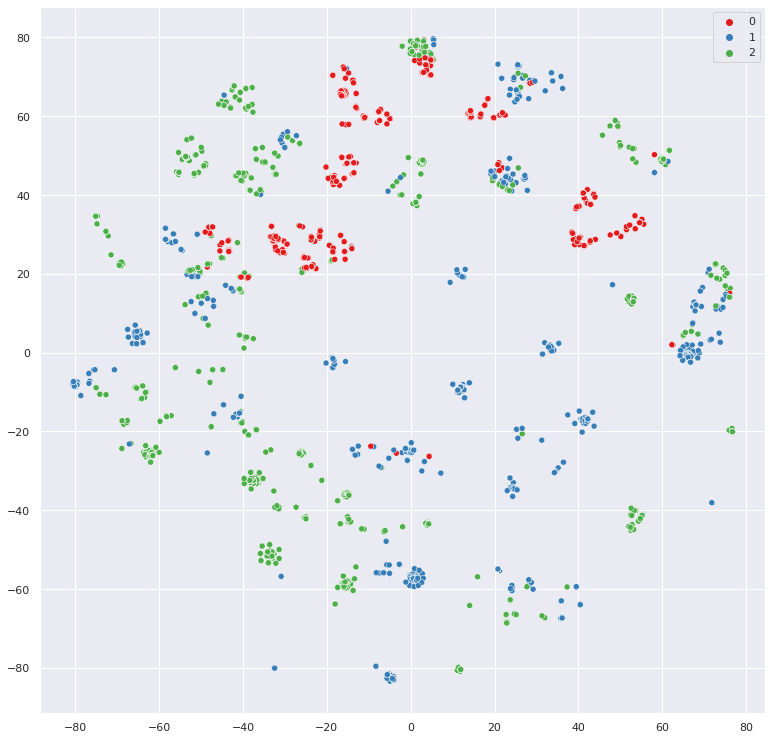

In [ ]:
#plotando os dados
import seaborn as sns
sns.set(rc={'figure.figsize' : (13,13)}) #redimensionando o tamanho da imagem
sns.scatterplot(x=visualizacao[:,0],
                y=visualizacao[:,1],
                hue=modelo.labels_,
                palette = sns.color_palette('Set1',3))

#Criando 20 grupos

In [ ]:
modelo = KMeans(n_clusters=20)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns=generos.columns)
grupos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.05918,-0.152234,-0.353808,-0.253113,-0.265096,-0.395634,-0.259612,-0.217489,-0.620708,-0.180374,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.377002,0.450716,0.640877,-0.20202,-0.132065
1,-0.05918,-0.480607,-0.385949,-0.258679,-0.022621,1.256846,-0.374632,-0.217489,-0.287237,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
2,-0.05918,-0.480607,-0.385949,-0.258679,-0.203763,-0.792126,-0.374632,-0.217489,1.110807,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.20202,-0.132065
3,-0.05918,-0.456038,-0.357392,-0.238898,-0.260936,-0.599974,-0.338134,4.597924,-0.808616,-0.277127,-0.094926,-0.318096,-0.128397,-0.188419,-0.229602,-0.429675,-0.334435,-0.479140,-0.07847,-0.132065
4,-0.05918,2.080702,-0.385949,-0.258679,-0.154879,-0.000891,-0.374632,-0.217489,-0.405619,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.390171,-0.334435,0.105698,-0.20202,-0.132065


In [ ]:
grupos.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
(no genres listed),-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,16.897616,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180,-0.059180
Action,-0.152234,-0.480607,-0.480607,-0.456038,2.080702,-0.480607,0.146436,0.128485,-0.333405,0.402104,1.026999,-0.440080,-0.435960,0.296838,-0.151082,0.942343,0.168335,0.702981,-0.128614,0.821392
Adventure,-0.353808,-0.385949,-0.385949,-0.357392,-0.385949,-0.385949,0.867837,0.249380,-0.317512,0.034527,1.121377,-0.027959,-0.306745,-0.280733,-0.252478,0.840923,0.875592,-0.233097,-0.385949,2.591019
Animation,-0.253113,-0.258679,-0.258679,-0.238898,-0.258679,-0.258679,3.865793,-0.183231,-0.163864,-0.200424,0.628865,0.563605,-0.258679,-0.241530,-0.186320,-0.225350,-0.258679,-0.218342,-0.258679,-0.258679
Children,-0.265096,-0.022621,-0.203763,-0.260936,-0.154879,-0.270451,1.565355,-0.125281,-0.270451,-0.259242,0.482962,0.721543,-0.241328,-0.262202,-0.200838,-0.110129,0.619229,-0.270451,-0.270451,0.457011
Comedy,-0.395634,1.256846,-0.792126,-0.599974,-0.000891,-0.792126,0.141373,-0.303544,-0.744895,-0.467113,-0.441032,0.248153,0.502806,0.151857,-0.511778,-0.418572,0.147624,-0.480678,-0.635932,-0.090155
Crime,-0.259612,-0.374632,-0.374632,-0.338134,-0.374632,-0.374632,-0.286219,-0.189027,1.444723,-0.297244,-0.162713,-0.297570,-0.374632,2.669289,0.479802,-0.331586,-0.299557,2.669289,-0.374632,-0.290078
Documentary,-0.217489,-0.217489,-0.217489,4.597924,-0.217489,-0.217489,-0.217489,-0.188127,-0.217489,-0.190284,0.026329,-0.034626,-0.217489,-0.217489,-0.217489,-0.217489,-0.217489,-0.217489,-0.217489,-0.217489
Drama,-0.620708,-0.287237,1.110807,-0.808616,-0.405619,-0.900247,-0.629047,-0.189021,0.255531,0.747226,-0.492945,-0.181104,0.324835,0.236981,0.134681,-0.485848,-0.273483,0.235580,0.481617,-0.185206
Fantasy,-0.180374,-0.294810,-0.294810,-0.277127,-0.294810,-0.294810,0.714860,-0.159926,-0.252433,-0.242736,0.801904,0.265214,-0.294810,-0.294810,-0.021712,-0.101158,3.392017,-0.249739,-0.294810,-0.294810


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fac8fdcdc50>,
      dtype=object)

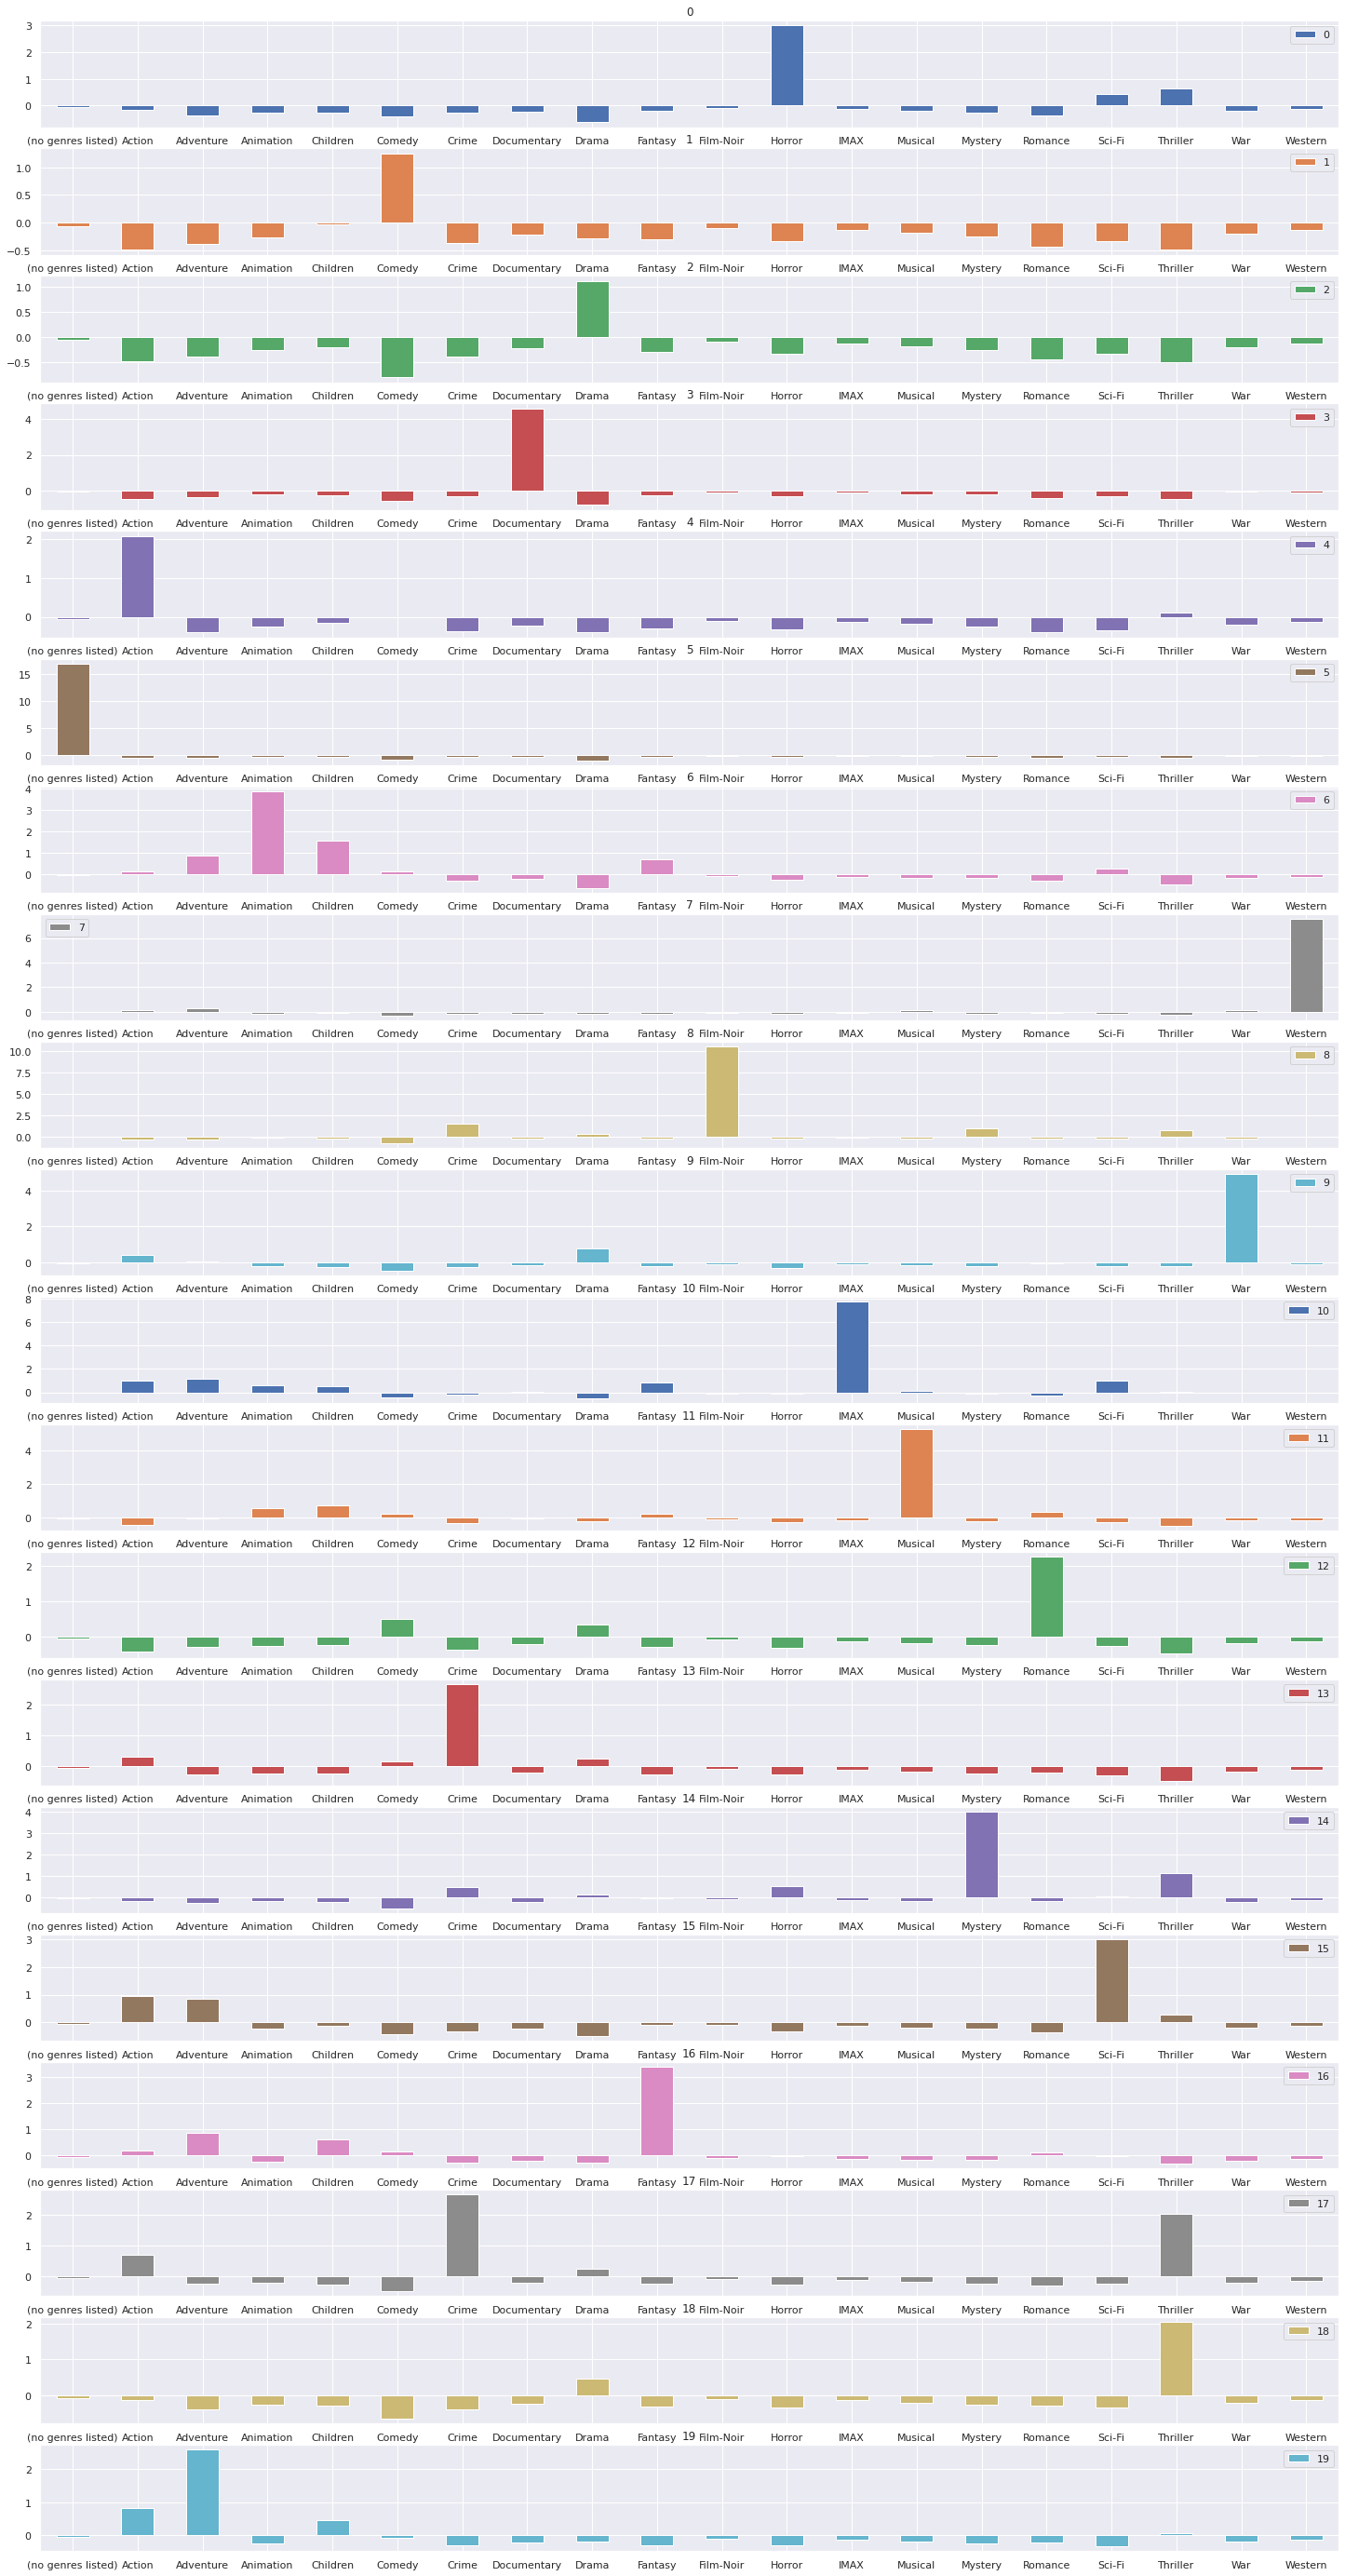

In [ ]:
grupos.transpose().plot.bar(subplots=True,
                            figsize=(25,50),
                            sharex=False,
                            rot=0)

In [ ]:
grupo = 6
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8167,102720,Epic (2013),Adventure|Animation|Fantasy,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4647,6946,Looney Tunes: Back in Action (2003),Action|Animation|Children|Fantasy,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5566,26743,Only Yesterday (Omohide poro poro) (1991),Animation|Drama,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9548,172887,Kid's Story (2003),Animation|Sci-Fi,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9379,163072,Winnie Pooh (1969),Animation|Children,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5141,8253,Lupin III: The Castle Of Cagliostro (Rupan san...,Action|Adventure|Animation|Comedy|Crime|Mystery,0,1,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1935,2566,Doug's 1st Movie (1999),Animation|Children,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
527,616,"Aristocats, The (1970)",Animation|Children,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5977,36397,Valiant (2005),Adventure|Animation|Children|Comedy|Fantasy|War,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
7650,88267,Winnie the Pooh (2011),Animation|Children|Comedy,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Otimizando o número de grupos (Método do Cotovelo)

In [ ]:
def kmeans(numero_de_clusters,generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_] #retorna o numero de cluster e o erro médio quadrado, distancia dos centroides
  #Este erro é a distância do centroide para cada dado pertencente ao grupo.



In [ ]:
kmeans(20,generos_escalados)

[20, 54471.05160411358]

In [ ]:
kmeans(3,generos_escalados)

[3, 166669.48247466332]

In [ ]:
resultado = [kmeans(numero_de_grupos,generos_escalados) for numero_de_grupos in range(1,41)]
resultado


[[1, 194840.0],
 [2, 179774.38443424553],
 [3, 167717.48523327248],
 [4, 157261.88473851298],
 [5, 147443.49406119224],
 [6, 137932.62776523456],
 [7, 127931.31727061415],
 [8, 118533.20323488803],
 [9, 109298.41788718745],
 [10, 101059.53546888957],
 [11, 94036.37880569529],
 [12, 87153.00981808323],
 [13, 79384.41530814077],
 [14, 73143.62192102877],
 [15, 69257.13502264657],
 [16, 64902.82217277863],
 [17, 63291.3710737381],
 [18, 58687.95550516676],
 [19, 56526.70548803968],
 [20, 55627.968661590276],
 [21, 53217.727719851595],
 [22, 52280.10359692728],
 [23, 51112.3478833781],
 [24, 48887.52445170676],
 [25, 48156.37156677338],
 [26, 46388.83393770516],
 [27, 45491.433112519466],
 [28, 43834.64269327826],
 [29, 43785.84373525567],
 [30, 42682.664394440624],
 [31, 41752.14336891503],
 [32, 40700.74921432059],
 [33, 40354.29893488708],
 [34, 39081.451162223966],
 [35, 38764.2827020201],
 [36, 38194.43012525937],
 [37, 37342.92720327896],
 [38, 36666.82253433674],
 [39, 36574.2565198

In [ ]:
resultado = pd.DataFrame(resultado,
             columns=['grupos','inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179774.384434
2,3,167717.485233
3,4,157261.884739
4,5,147443.494061
5,6,137932.627765
6,7,127931.317271
7,8,118533.203235
8,9,109298.417887
9,10,101059.535469


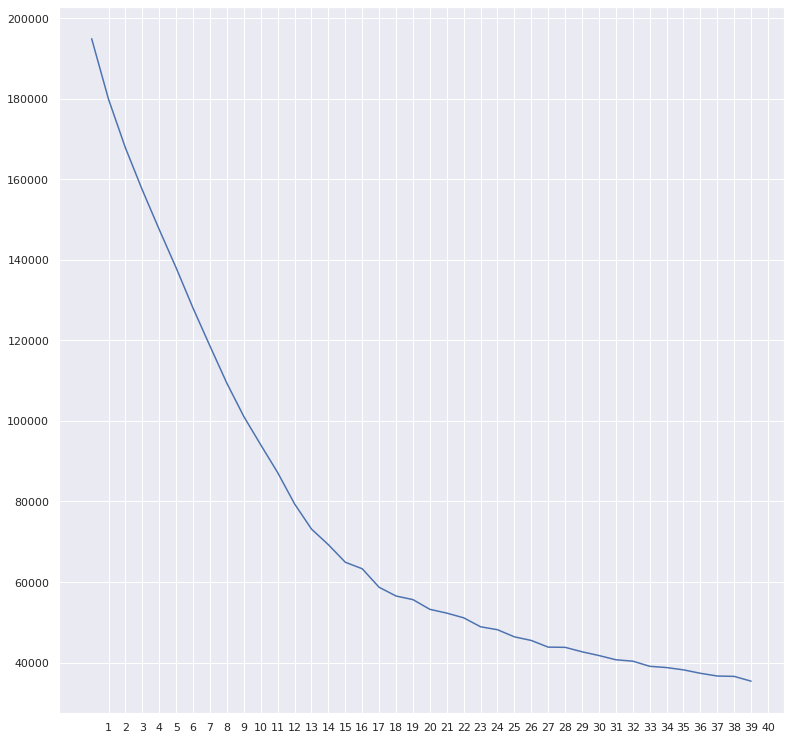

In [ ]:
resultado.inertia.plot(xticks=resultado.grupos) #o atributo xticks faz com que o grafico comece do 1 e não do 0, pois não temos 0 grupos

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fac870820f0>,
      dtype=object)

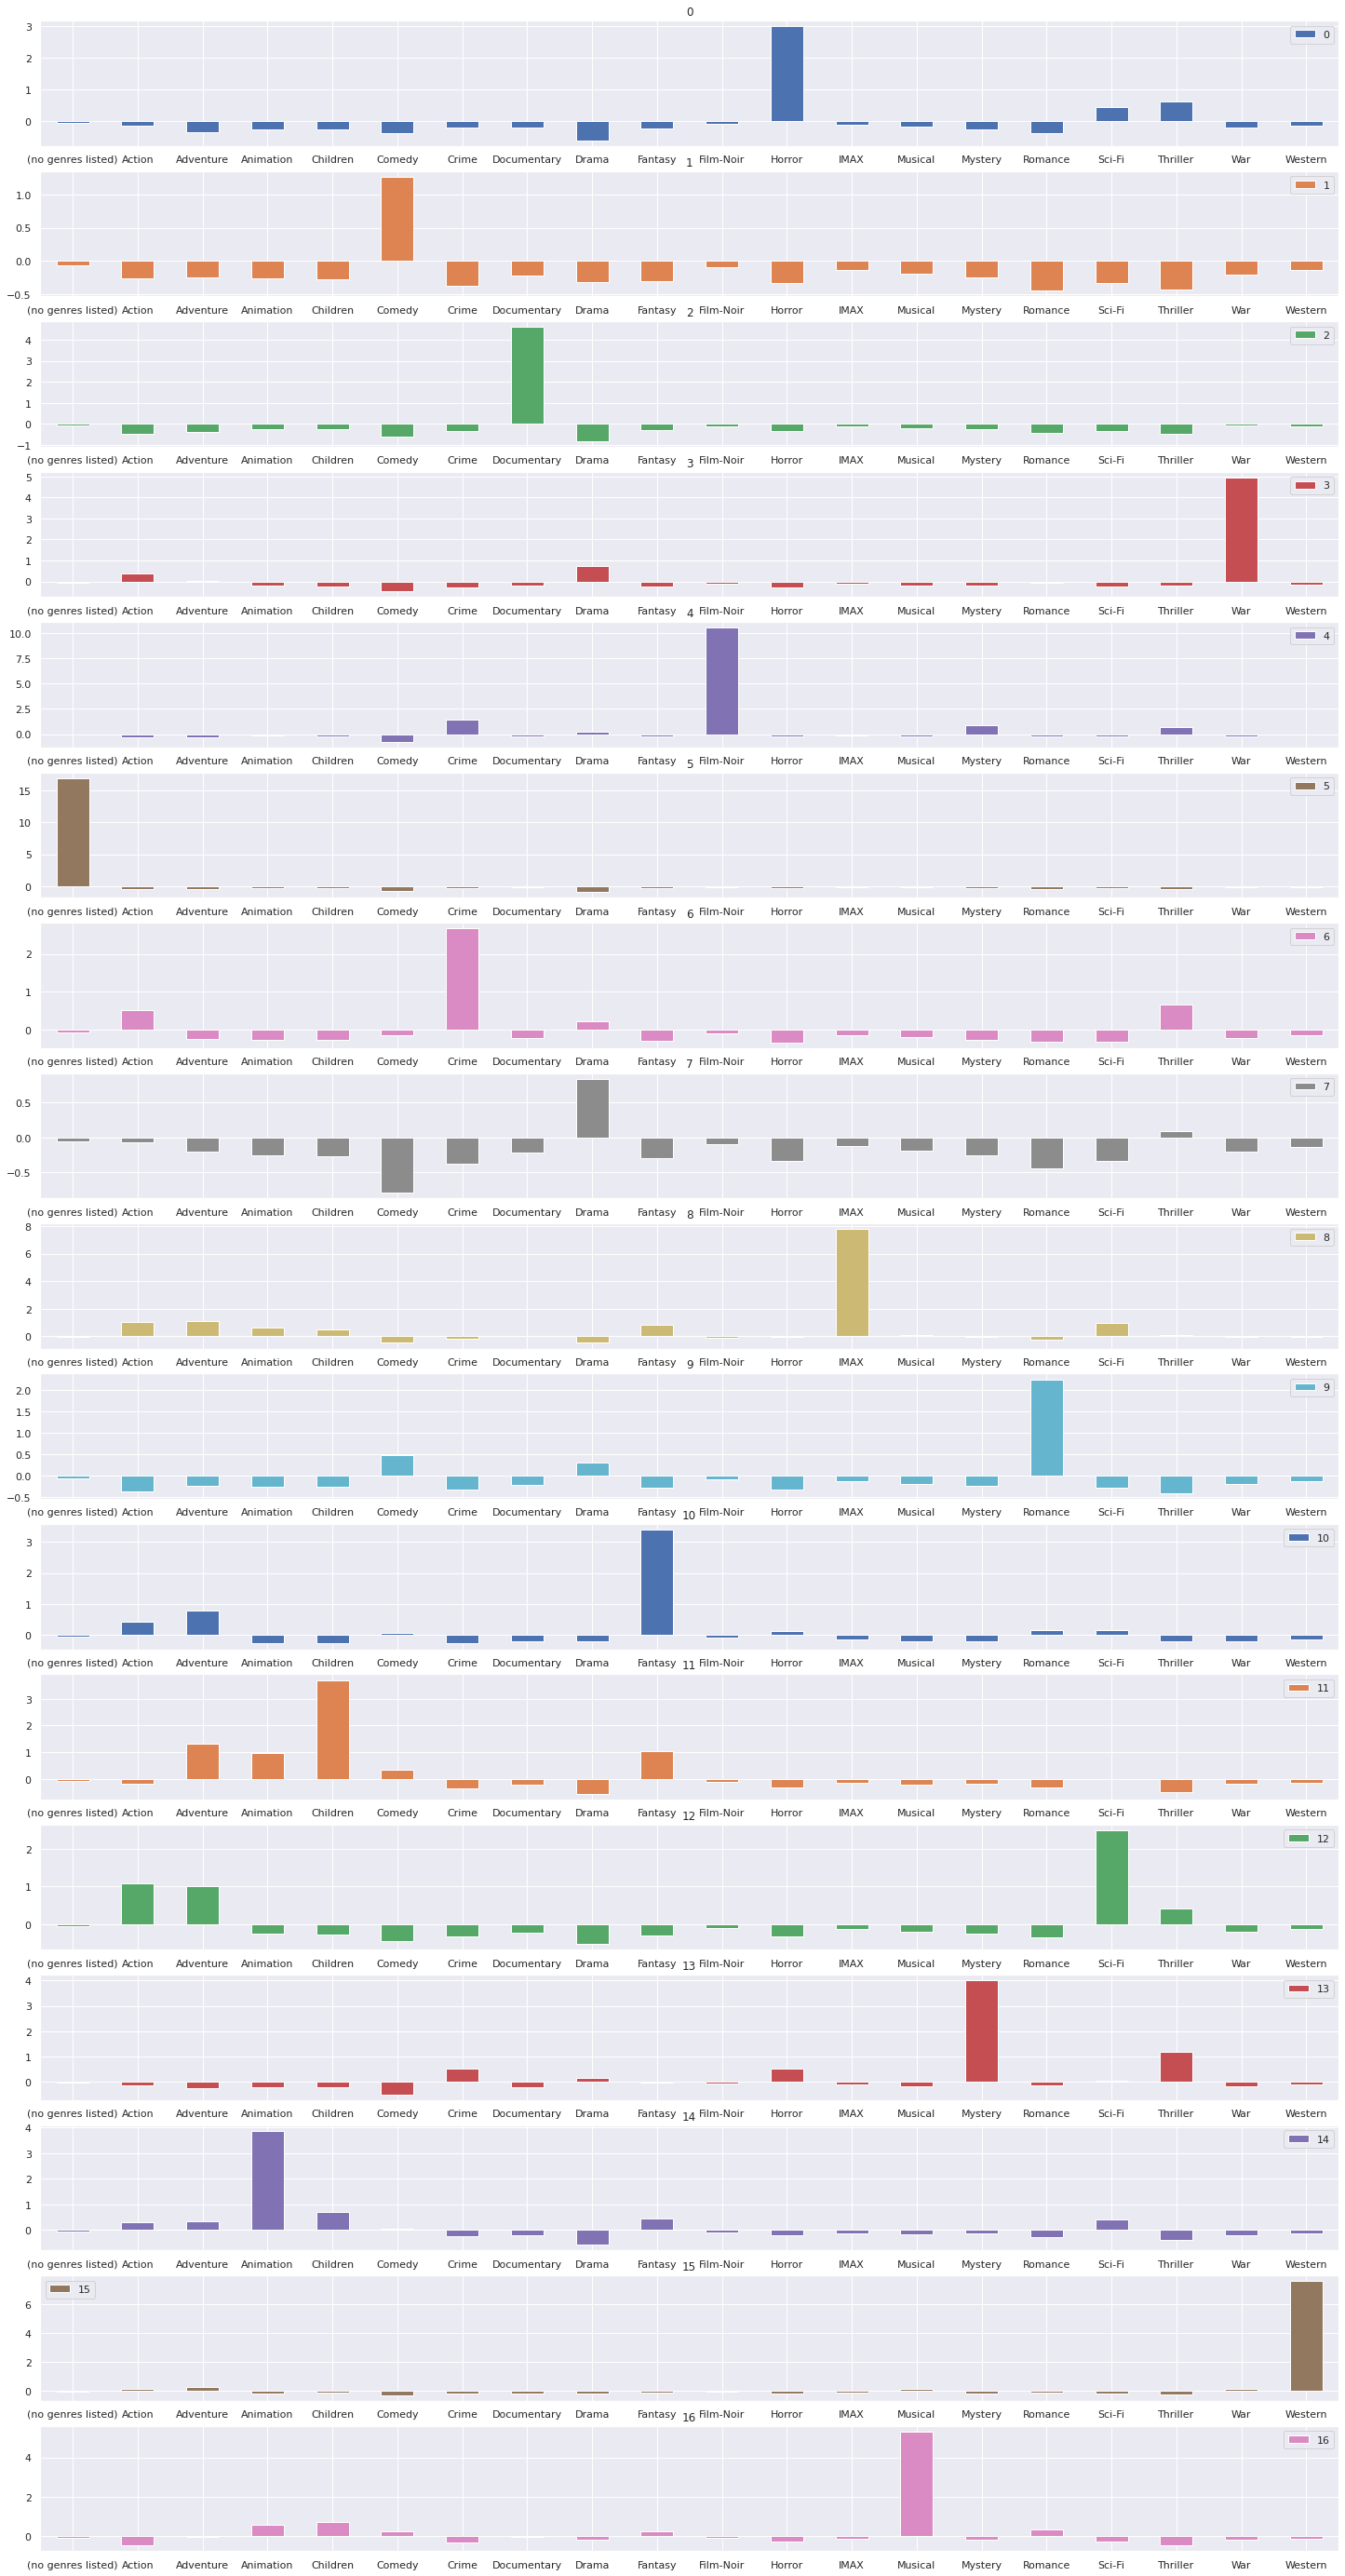

In [ ]:
#elbow method - método do cotovelo
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns=generos.columns)
grupos.transpose().plot.bar(subplots=True,
                            figsize=(25,50),
                            sharex=False,
                            rot=0)

In [ ]:
grupo = 15
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5480,26258,"Topo, El (1970)",Fantasy|Western,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
728,948,Giant (1956),Drama|Romance|Western,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3944,5550,Love Me Tender (1956),Musical|Western,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
9366,162350,The Magnificent Seven (2016),Action|Western,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4922,7379,The Alamo (2004),Drama|War|Western,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
765,1007,"Apple Dumpling Gang, The (1975)",Children|Comedy|Western,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
376,432,City Slickers II: The Legend of Curly's Gold (...,Adventure|Comedy|Western,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6596,55363,Assassination of Jesse James by the Coward Rob...,Crime|Drama|Western,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
178,210,Wild Bill (1995),Western,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1487,2012,Back to the Future Part III (1990),Adventure|Comedy|Sci-Fi|Western,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


#Agrupamento Hierarquico

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [ ]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ -1.4651772, -42.068832 ],
       [-21.300917 , -48.702335 ],
       [-32.409492 ,  -2.497906 ],
       ...,
       [-10.804374 , -22.865194 ],
       [ 71.8948   ,   6.3652883],
       [ -1.724239 ,  19.807875 ]], dtype=float32)

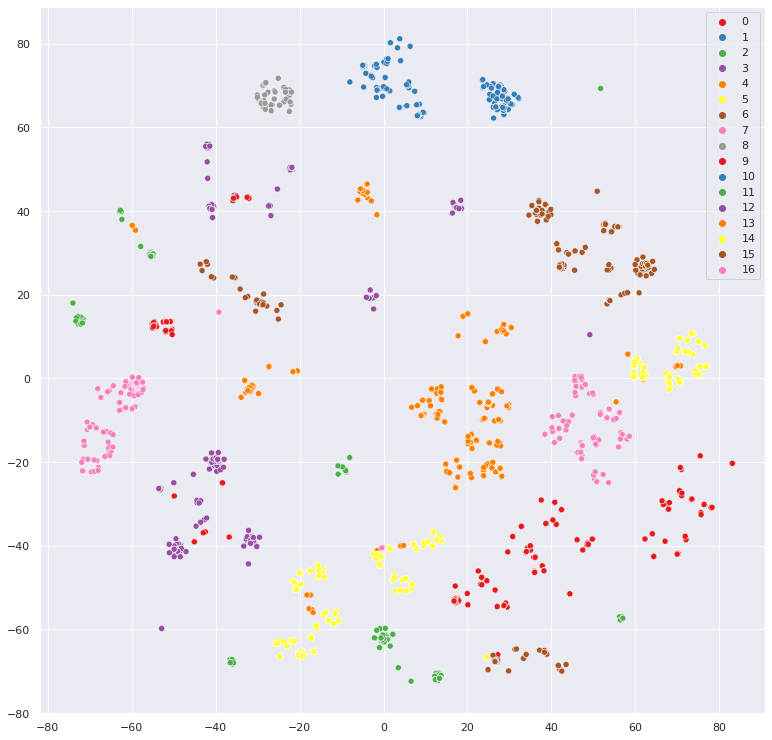

In [ ]:
sns.scatterplot(x=visualizacao[:,0],y=visualizacao[:,1],
                hue=grupos,
                palette=sns.color_palette('Set1',17))

In [ ]:
#DENDROGRAMA
from scipy.cluster.hierarchy import dendrogram,linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fac85c5bcc0>,
      dtype=object)

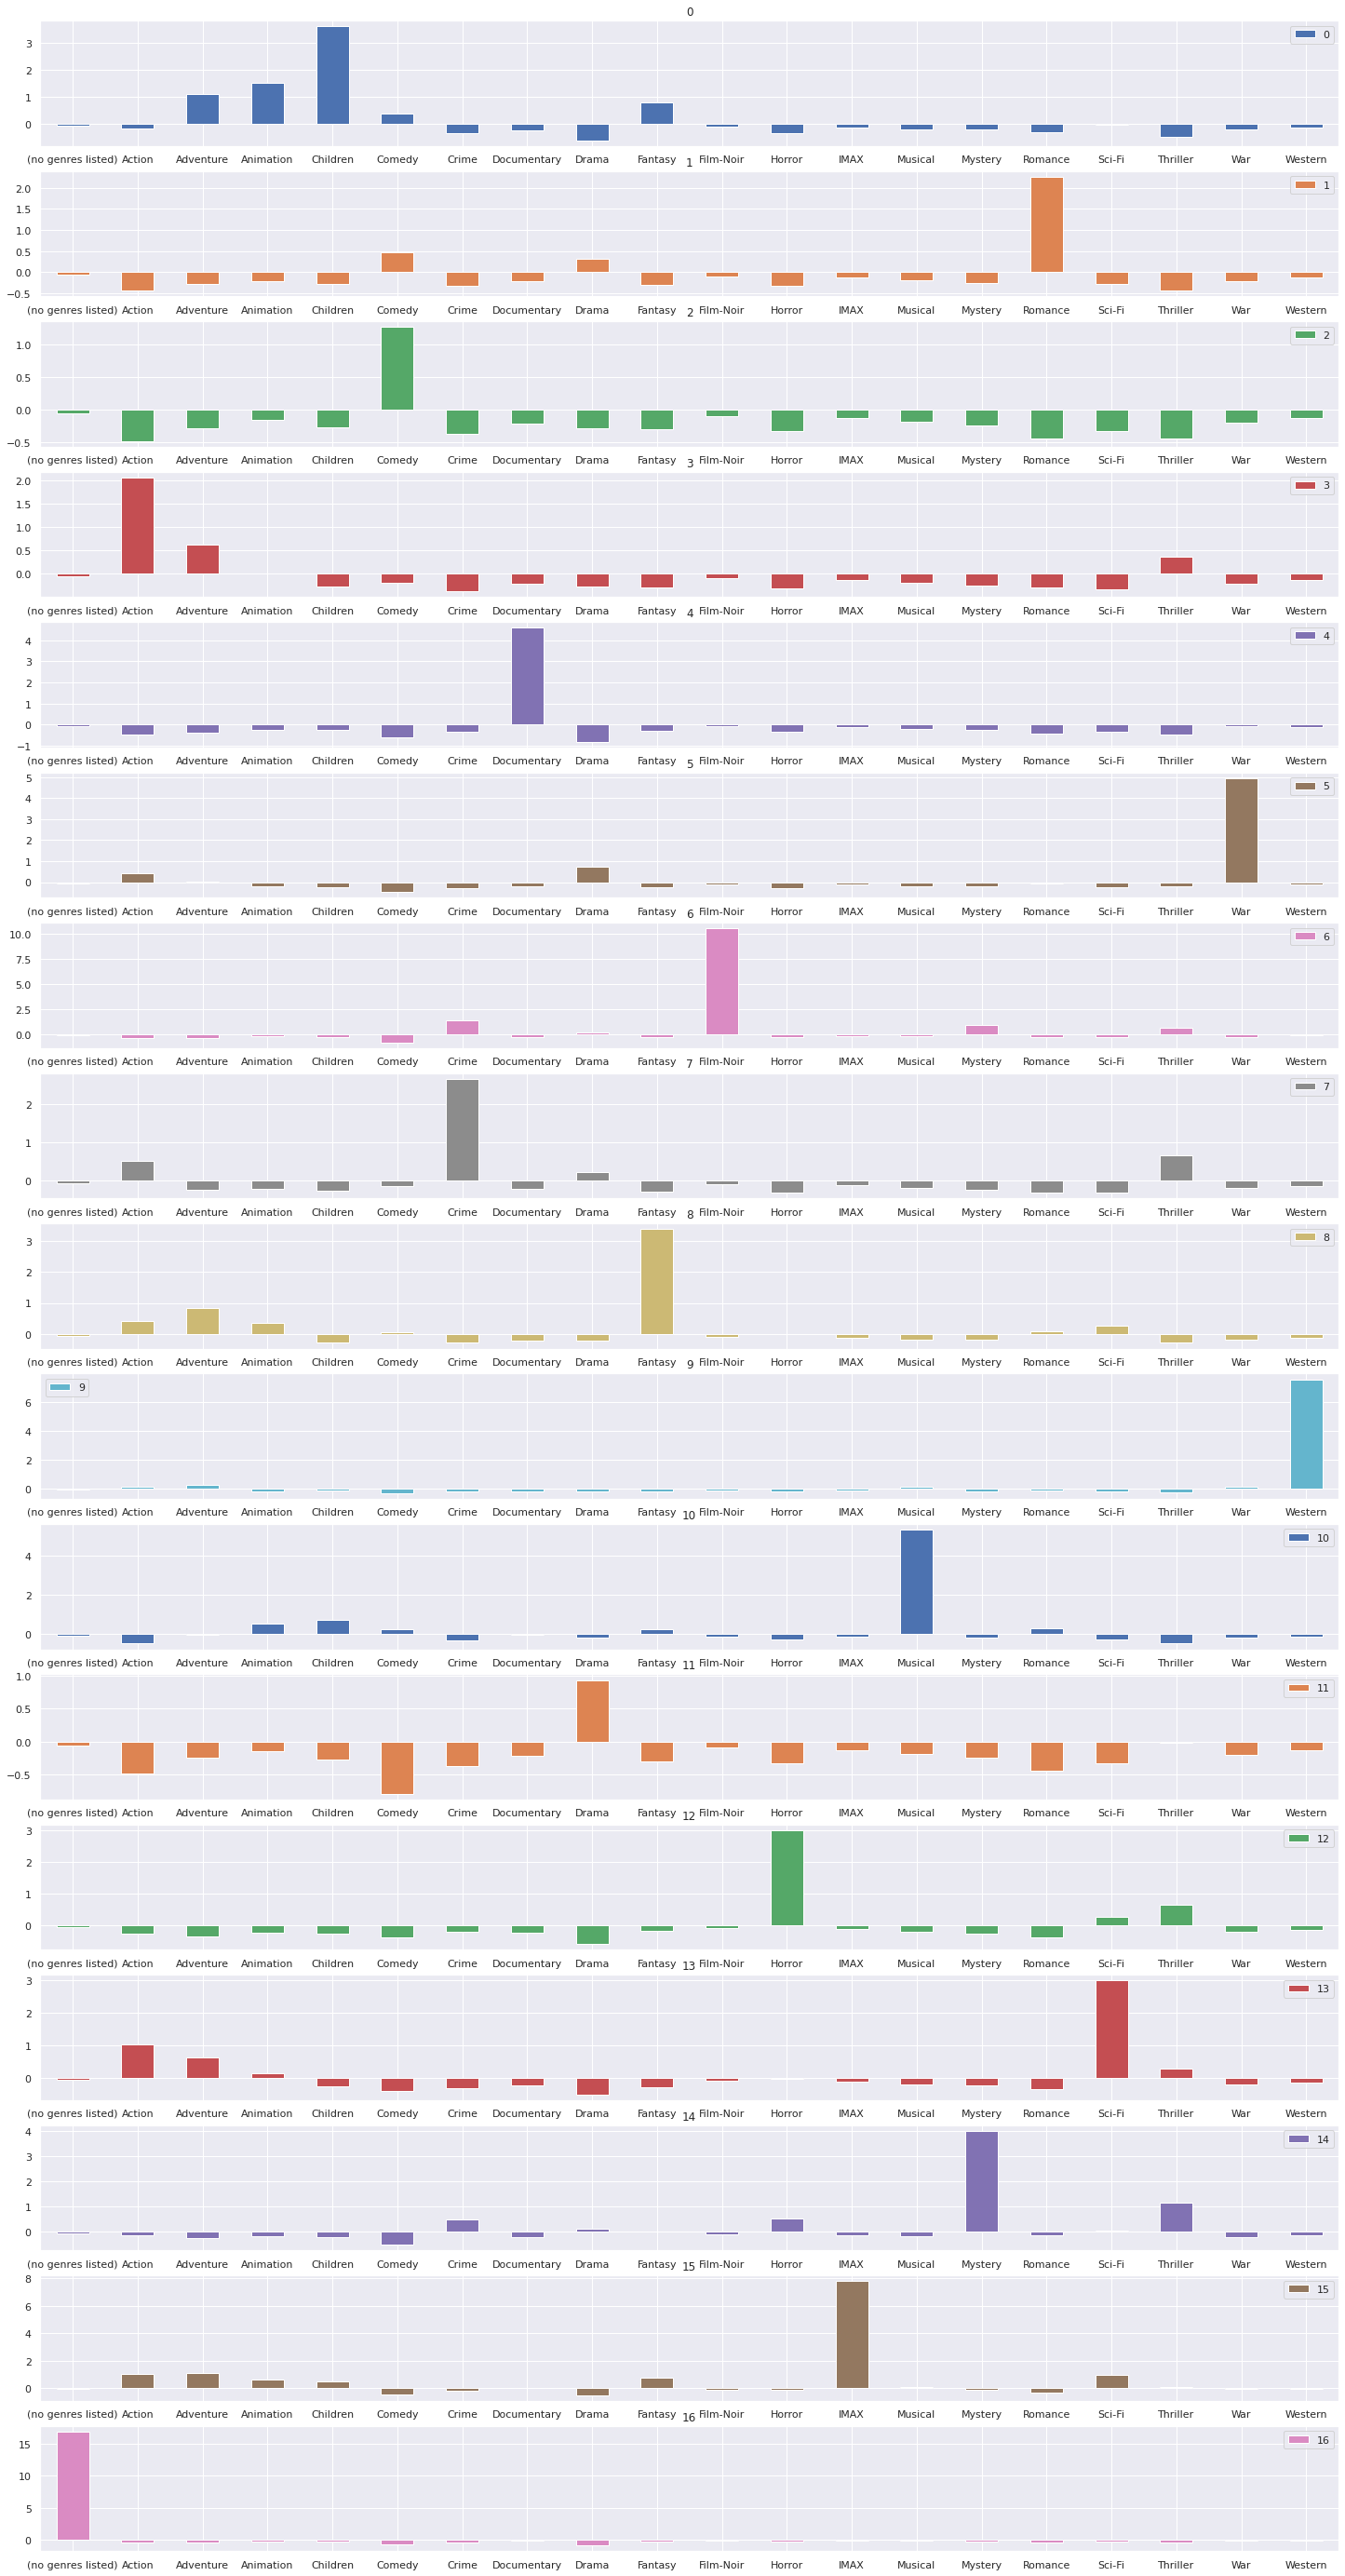

In [ ]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns=generos.columns)
grupos.transpose().plot.bar(subplots=True,
                            figsize=(25,50),
                            sharex=False,
                            rot=0)

In [ ]:
#Matriz de distancia dos grupos 
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 2.        , 11.        ,  2.42221253,  2.        ],
       [ 1.        , 17.        ,  2.87863937,  3.        ],
       [ 3.        , 18.        ,  3.04592186,  4.        ],
       [ 7.        , 19.        ,  3.41634049,  5.        ],
       [13.        , 20.        ,  3.51935879,  6.        ],
       [12.        , 21.        ,  3.80543607,  7.        ],
       [ 8.        , 22.        ,  4.20032483,  8.        ],
       [ 0.        , 23.        ,  4.67665729,  9.        ],
       [14.        , 24.        ,  4.6945188 , 10.        ],
       [ 4.        , 25.        ,  5.14777891, 11.        ],
       [ 5.        , 26.        ,  5.26779973, 12.        ],
       [10.        , 27.        ,  5.81254896, 13.        ],
       [ 9.        , 28.        ,  7.87112564, 14.        ],
       [15.        , 29.        ,  8.26846951, 15.        ],
       [ 6.        , 30.        , 10.81599373, 16.        ],
       [16.        , 31.        , 17.06282738, 17.        ]])

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b'],
 'dcoord': [[0.0, 2.422212527406077, 2.422212527406077, 0.0],
  [0.0, 2.8786393675982076, 2.8786393675982076, 2.422212527406077],
  [0.0, 3.0459218604466174, 3.0459218604466174, 2.8786393675982076],
  [0.0, 3.4163404900760863, 3.4163404900760863, 3.0459218604466174],
  [0.0, 3.5193587931183985, 3.5193587931183985, 3.4163404900760863],
  [0.0, 3.805436072665502, 3.805436072665502, 3.5193587931183985],
  [0.0, 4.200324834965608, 4.200324834965608, 3.805436072665502],
  [0.0, 4.676657290599549, 4.676657290599549, 4.200324834965608],
  [0.0, 4.694518800619841, 4.694518800619841, 4.676657290599549],
  [0.0, 5.147778911522332, 5.147778911522332, 4.694518800619841],
  [0.0, 5.267799729029064, 5.267799729029064, 5.147778911522332],
  [0.0, 5.8125489571328295, 5.8125489571328295, 5.267799729029064],
  [0.0, 7.871125641973973, 7.871125641973973, 5.8125489571328295],
  [0

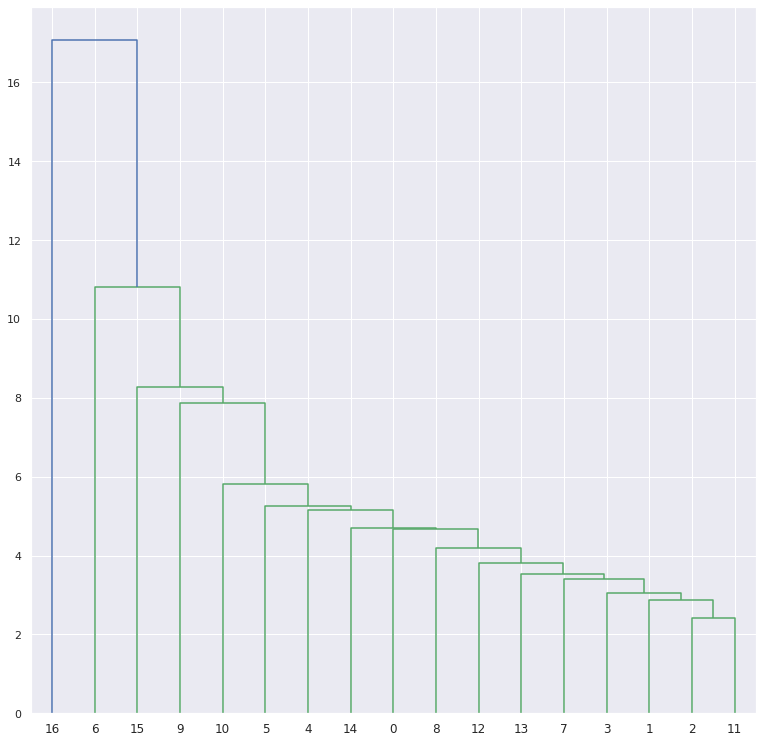

In [ ]:
dendrograma = dendrogram(matriz_de_distancia)
dendrograma

#Agrupamento por Densidade

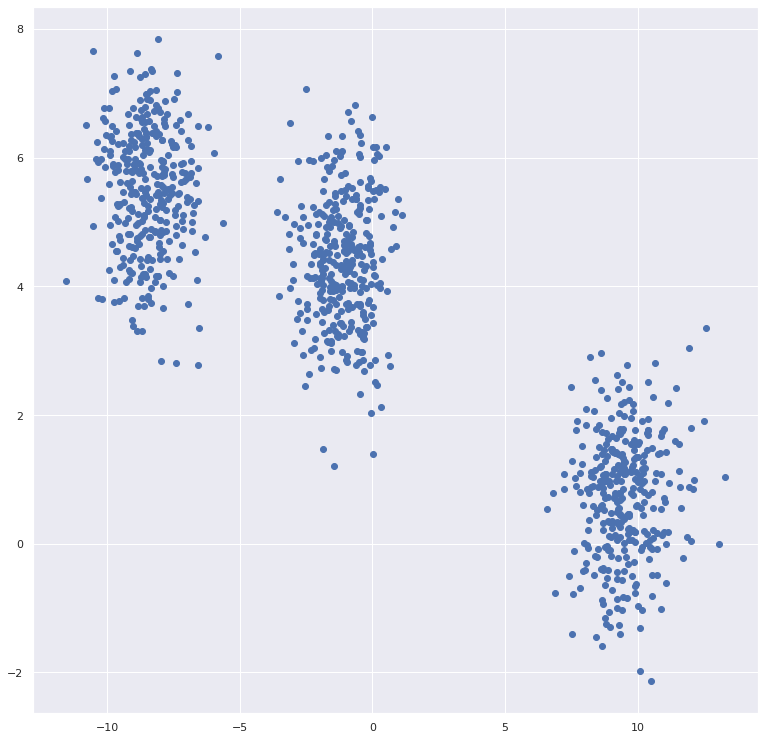

In [ ]:
#quando não sabemos o numero de cluster passar, o agrupamento por densidade tentara agrupar de acordo com a densidade dos pontos
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

dados, _ = make_blobs(n_samples=1000, n_features=2, random_state=7)
dados = pd.DataFrame(dados, columns=['coluna1', 'coluna2'])
plt.scatter(x=dados.coluna1, y=dados.coluna2)


In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

dados, _ = make_blobs(n_samples=1000, n_features=2, random_state=7)
dados = pd.DataFrame(dados, columns=['coluna1', 'coluna2'])
# plt.scatter(x=dados.coluna1, y=dados.coluna2)
modelo = DBSCAN()
grupos = modelo.fit_predict(dados)
grupos = pd.DataFrame(grupos,columns=['coluna1', 'coluna2'])
plt.scatter(x=grupos.coluna1, y=dados.coluna2)

ValueError: ignored